In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates


from glob import glob
import datetime
now = datetime.date.today() # data do pliku

In [2]:
pd.set_option('display.width', None)
pd.set_option('display.max_rows', None)
pd.set_option('colheader_justify', 'center')

In [3]:
# import starych df
data_files = sorted(glob('Dane/dane*.csv'))
df_old=pd.concat((pd.read_csv(file) for file in data_files), ignore_index=True)
df_old['date']=pd.to_datetime(df_old['date'])
df_old.drop('Unnamed: 0',axis=1,inplace=True,errors='ignore')

In [4]:
from data import dane

In [5]:
df_new = pd.DataFrame(dane, columns=['date', 'name', 'url', 'price', 'currency'])

In [6]:
df_new.to_csv(f'Dane/dane{now}.csv',mode='a', header=False)

# Mardzin framow

In [7]:
df_all=pd.concat([df_old, df_new], ignore_index=True)

In [8]:
df_all.to_csv(f'Dane/all_data.csv')

In [9]:
# Produktuy

In [10]:
df_produkty=df_all[['name','url']].drop_duplicates()
# df_produkty.set_index('name',inplace=True)
df_produkty.reset_index(inplace=True,drop=True)
df_produkty

,name,url
0,quilt,https://cumulus.equipment/pl_pl/spiwory/quilty...
1,esker,https://kross.eu/pl/rowery/szosowe/gravel/eske...
2,selex400_1,https://www.merida-bikes.com/pl-pl/bike/667/si...
3,silex400_2,https://rower.com.pl/merida-silex-400--2079478
4,silex400_3,http://www.megastart.pl/rowery/turystyczne/sil...
5,worek5L,https://8a.pl/worek-wodoszczelny-exped-fold-dr...
6,worek4L,https://www.skalnik.pl/worek-ultra-sil-nano-4l...
7,stuptuty,https://8a.pl/stuptuty-biegowe-inov-8-all-terr...
8,ponczo,https://www.decathlon.pl/p/ponczo-my-liwskie-g...
9,worek5L-2,https://8a.pl/lifeventure-ultralight-dry-bag-5-l


# Pivoty

In [11]:
piv=df_all.pivot_table(index=(df_all.date.dt.year,df_all.date.dt.month,df_all.date.dt.day),columns='name',values='price',aggfunc=min)

In [12]:
piv

name             esker  katadyn_1l  ponczo  quilt  selex400_1  silex400_2  \
date date date                                                              
2020 12   1     4899.0       NaN     59.99  889.0    6699.0      6499.0     
          2     4899.0       NaN     59.99  889.0    6699.0      6499.0     
          3     4899.0       NaN     59.99  889.0    6699.0      6499.0     
          5     4899.0       NaN     59.99  889.0    6699.0      6499.0     
          6     4899.0       NaN     59.99  889.0    6699.0      6499.0     
          7     4899.0    203.99     59.99  889.0    6699.0      6499.0     
          8     4899.0    203.99     59.99  889.0    6699.0      6499.0     
          9     4899.0    203.99     59.99  889.0    6699.0      6499.0     
          10    4899.0    203.99     59.99  889.0    6699.0      6499.0     
          11    4899.0    203.99     59.99  889.0    6699.0      6499.0     

name            silex400_3  stuptuty  stuptuty_gore  worek4L  worek5L  \
date date date                                                          
2020 12   1       6999.0      51.99         NaN       43.86    59.49    
          2       6999.0      71.99         NaN       43.86    79.49    
          3       6999.0      71.99         NaN       43.86    59.49    
          5       6999.0      71.99         NaN       43.86    59.49    
          6       6999.0      71.99         NaN       43.86    59.49    
          7       6999.0      71.99         NaN       43.86    59.49    
          8       6999.0      71.99         NaN       43.86    59.49    
          9       6999.0      71.99      114.79       43.86    59.49    
          10      6999.0      71.99      114.79       43.86    59.49    
          11      6999.0      71.99      114.79       43.86    59.49    

name            worek5L-2  x-box x  
date date date                      
2020 12   1         NaN       NaN   
          2         NaN       NaN   
          3         NaN       NaN   
          5         NaN       NaN   
          6       47.39       NaN   
          7       47.39       NaN   
          8       47.39       NaN   
          9       47.39       NaN   
          10      47.39       NaN   
          11      47.39    2249.0

In [13]:
filtr1=piv.diff().ne(0).any(1)

In [14]:
filtr2=piv.diff().any(1)

In [15]:
df_diff=piv[filtr1]

# Ploty

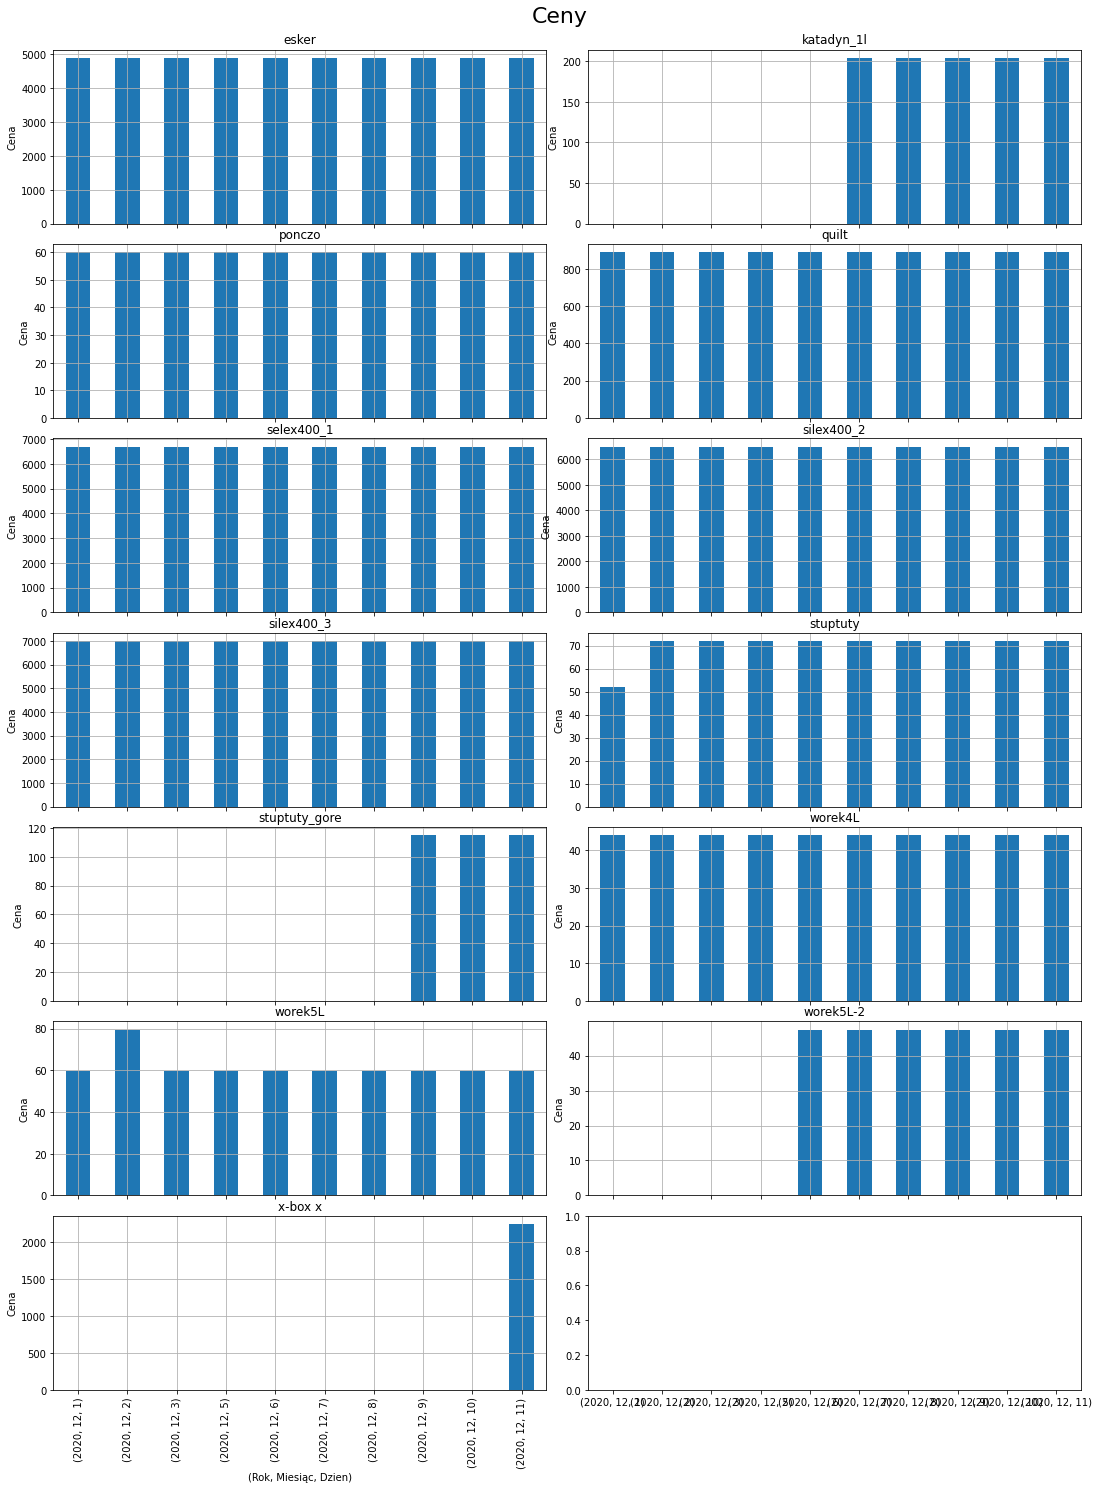

In [16]:
fig, axes = plt.subplots(int(np.ceil(piv.columns.size/2)),2,figsize=(15,20),sharex=True)
fig.suptitle('Ceny', fontsize=22)
fig.tight_layout()
fig.subplots_adjust(top=0.95)
for n,a in enumerate(axes.flat):
    if n < piv.columns.size:
        piv.iloc[:,n].plot(ax=a,kind='bar',grid=True)
        a.set(xlabel=f'(Rok, Miesiąc, Dzien)', ylabel=f'Cena',title=f"{piv.columns[n]}")

plt.savefig('Fig/graph.png',transparent=False)
# plt.show()


In [17]:
# testy